### Final project COGS 118A

1. #### classifiers selected
    linearSVC   
    Random Forest 
    K-Nearest-Neighbors    
    Naive Bayes  
    
2. #### datasets  
    breast cancer: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic (predict is benign or malign)
    spambase: https://archive.ics.uci.edu/dataset/94/spambase (predict if email is spam)
    hearth disease: https://archive.ics.uci.edu/dataset/45/heart+disease (predict if person has hearth disease)  
    income: https://archive.ics.uci.edu/dataset/2/adult (predict if income above $50.000)  

3. #### metrics selected
    accuracy 
    roc_auc  
    f1 of positive class  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
from source import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np

In [ ]:
# import datasets
breast_cancer = fetch_ucirepo(id=17) 
spambase = fetch_ucirepo(id=94) 
heart_disease = fetch_ucirepo(id=45) 
income = fetch_ucirepo(id=2) 

In [ ]:
# separate features from target

X_breast_cancer = breast_cancer.data.features
y_breast_cancer = breast_cancer.data.targets

X_spambase = spambase.data.features
y_spambase = spambase.data.targets

X_heart_disease = heart_disease.data.features
y_heart_disease = heart_disease.data.targets

X_income = income.data.features
y_income = income.data.targets

In [ ]:
## the target variable needs to be encoded to 0 and 1

y_breast_cancer = pd.DataFrame(y_breast_cancer.loc[:,'Diagnosis'].map({'M': 1, 'B': 0}))
y_spambase = pd.DataFrame(y_spambase.loc[:,'Class'].map({0: 0, 1: 1}))
y_heart_disease = pd.DataFrame(y_heart_disease.loc[:,'num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}))
y_income = pd.DataFrame(y_income.loc[:,'income'].map({'<=50K': 0,'<=50K.':0, '>50K.': 1, '>50K': 1}))

## check for nan values

print(y_breast_cancer.isnull().sum().sum())
print(y_spambase.isnull().sum().sum())
print(y_heart_disease.isnull().sum().sum())
print(y_income.isnull().sum().sum())

0
0
0
0


In [7]:
# define a grid of hyperparameters for each model matching the paper specifics
grid = {
    RandomForestClassifier: {
        'n_estimators': [1024],  
        'max_features': [1, 2, 4, 8, 12, 16, 20],  
    },
    LinearSVC: {  
        'C': [10**i for i in range(-7, 4)],  
    },
    KNeighborsClassifier: {
        'n_neighbors': [2**i for i in range(0, 10)],  
        'weights': ['uniform', 'distance'],  
        'metric': ['euclidean']  
    },    
    GaussianNB: {  
        'var_smoothing': [10**i for i in range(-10, 1)],  
    }
}

In [ ]:
# define a dictionary of datasets
dfs = {"breast_cancer": (X_breast_cancer, y_breast_cancer),
       "spambase": (X_spambase, y_spambase),
       "heart_disease": (X_heart_disease, y_heart_disease),
       "income": (X_income, y_income)}

In [9]:
# train and validate
trainer = TrainAndValidate(grid = grid, data = dfs, partitions=[0.2, 0.5, 0.8], n_trials=3)
trainer.train_and_validate()

Dataset: breast_cancer
Classifier: RandomForestClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: LinearSVC
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: KNeighborsClassifier
Partition: 0.2 training, 0.8 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Partition: 0.5 training, 0.5 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Partition: 0.8 training, 0.19999999999999996 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Classifier: GaussianNB
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Dataset: spambase
Classifier: RandomForestClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: LinearSVC
Partition: 0.2 training, 0.8 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: KNeighborsClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: GaussianNB
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Dataset: heart_disease
Classifier: RandomForestClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: LinearSVC
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: KNeighborsClassifier
Partition: 0.2 training, 0.8 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Partition: 0.5 training, 0.5 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Partition: 0.8 training, 0.19999999999999996 testing


/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/olimpiacarrioli/Desktop/cogs118a/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_calle

Classifier: GaussianNB
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Dataset: income
Classifier: RandomForestClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: LinearSVC
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: KNeighborsClassifier
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing
Classifier: GaussianNB
Partition: 0.2 training, 0.8 testing
Partition: 0.5 training, 0.5 testing
Partition: 0.8 training, 0.19999999999999996 testing


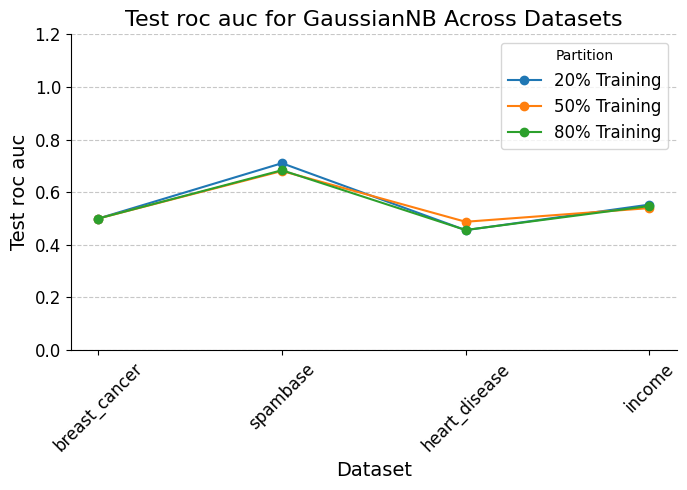

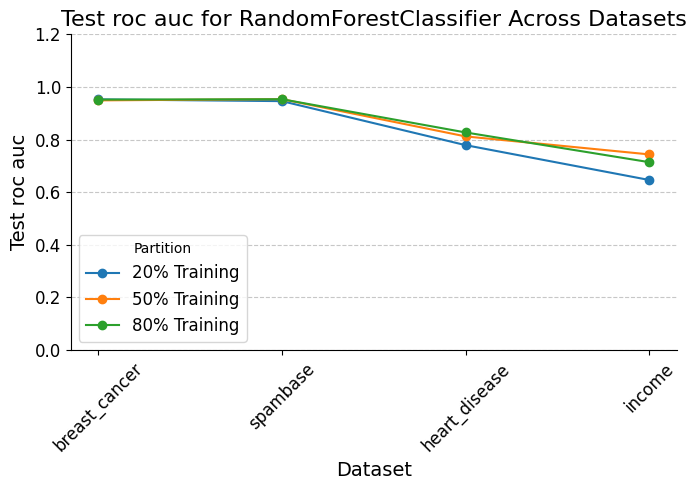

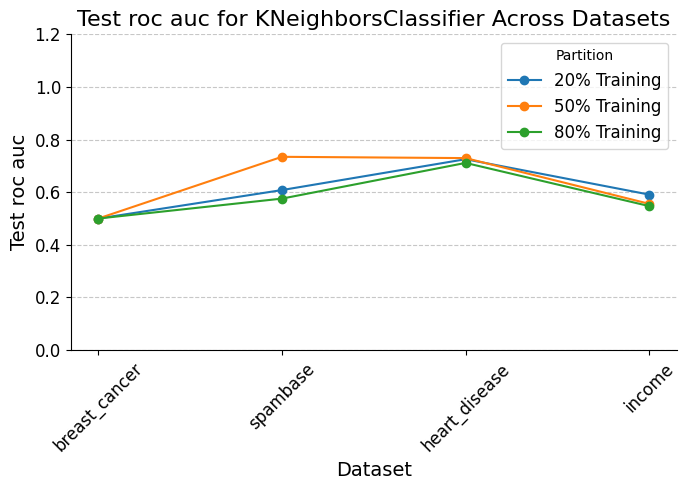

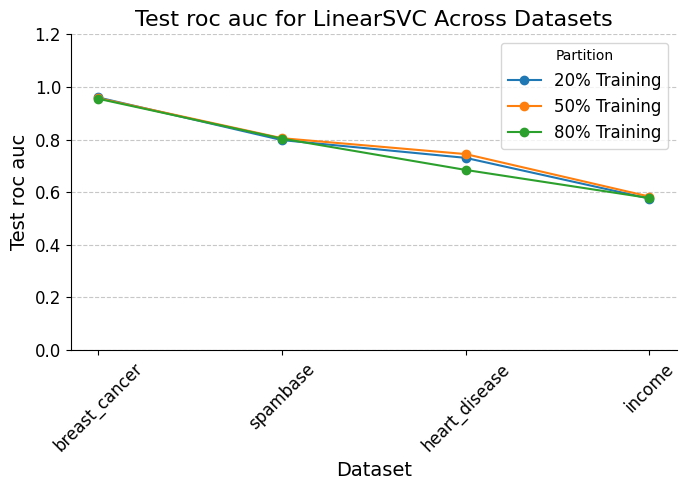

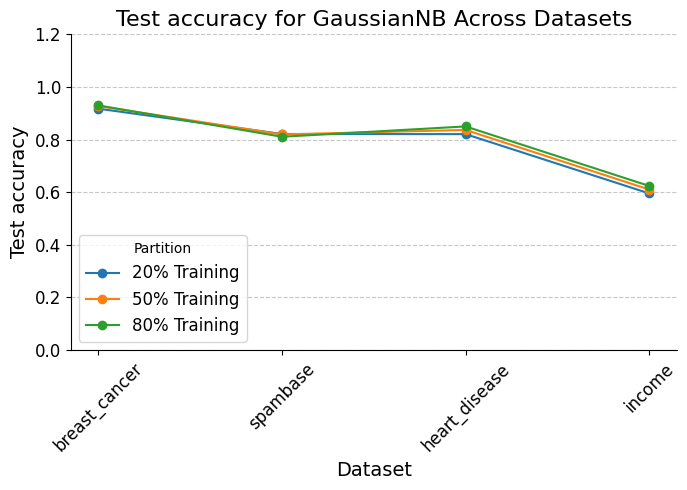

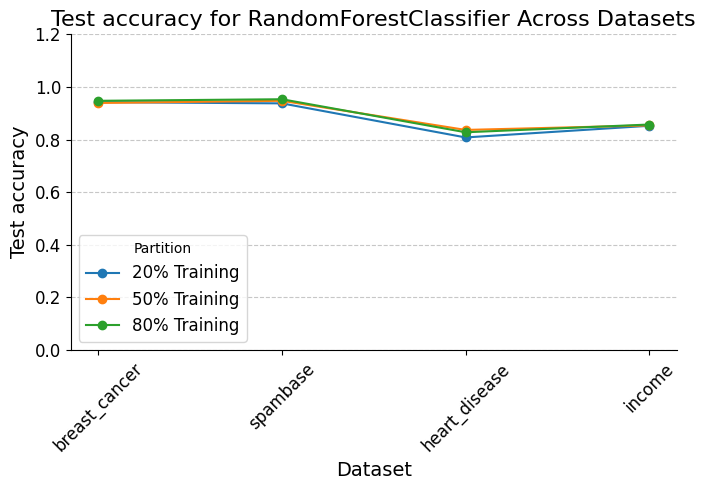

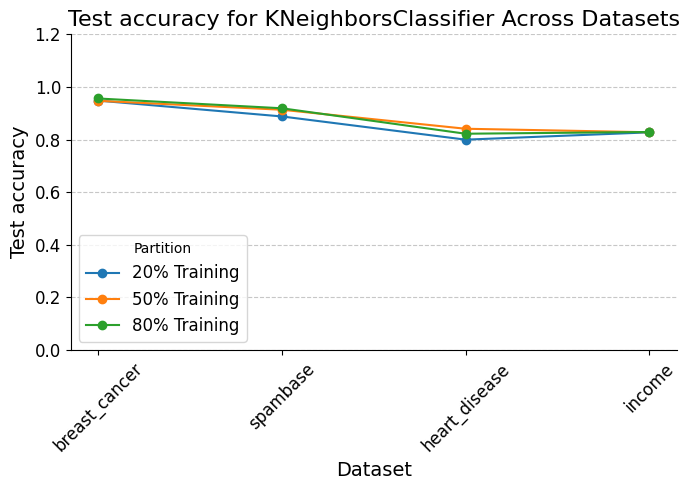

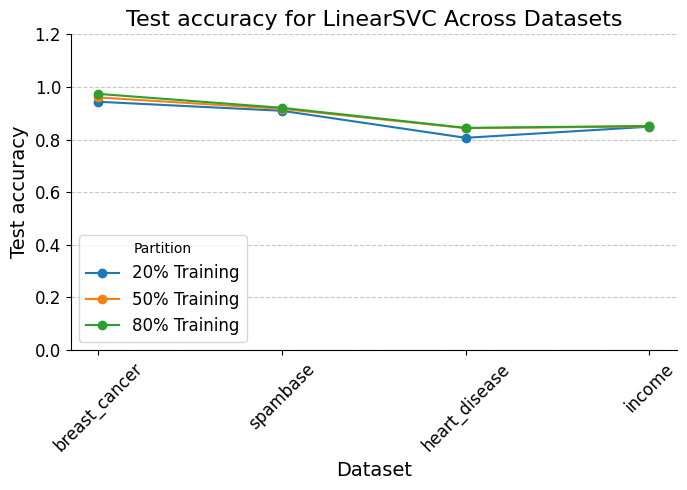

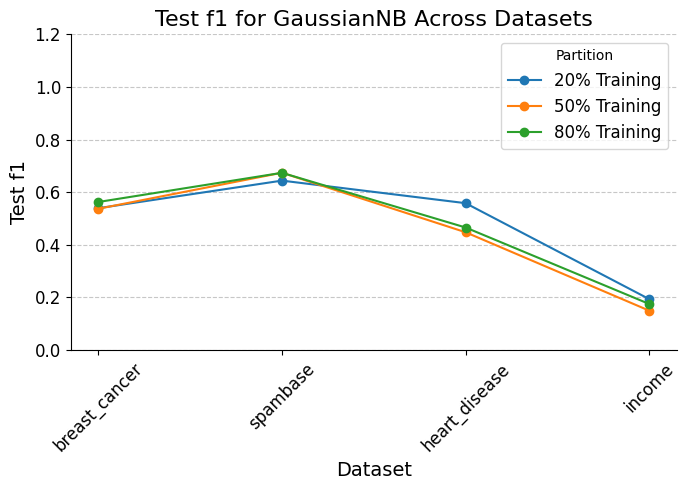

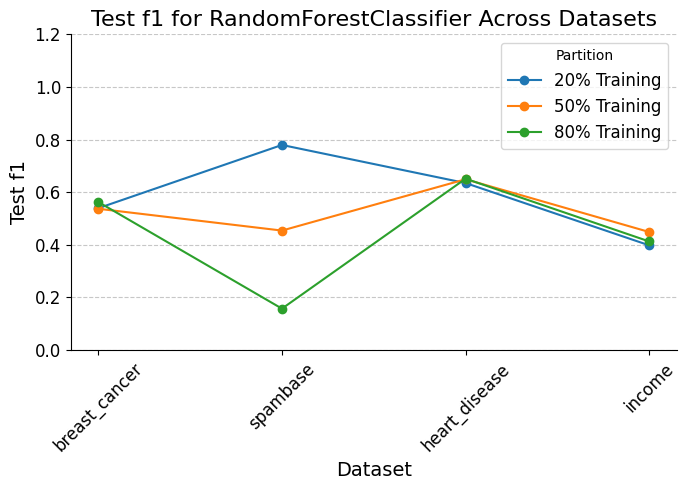

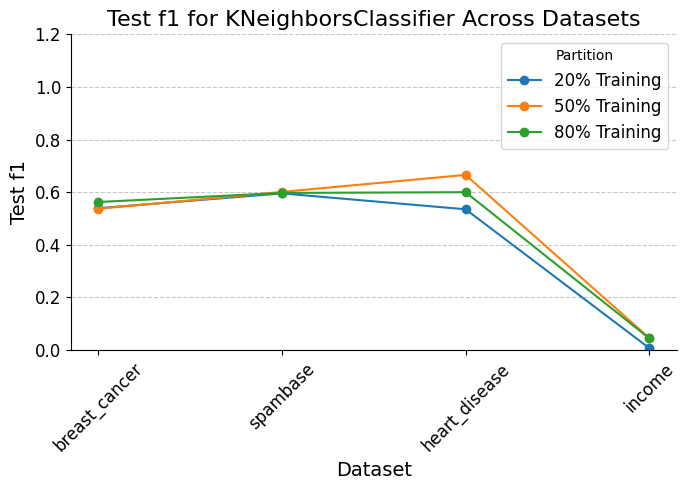

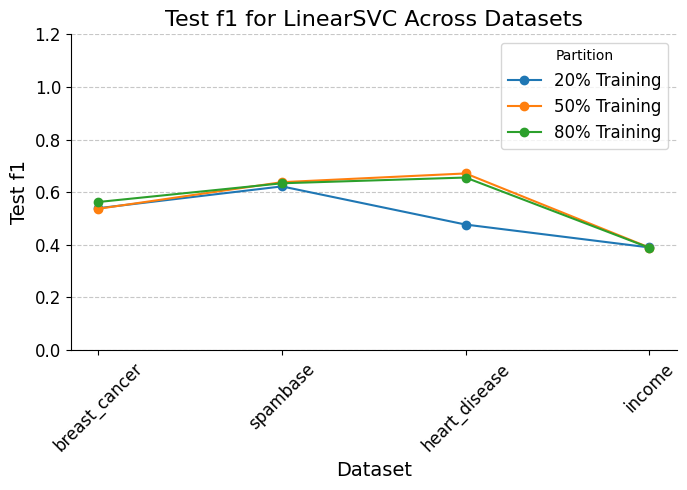

In [10]:
# each instance gives three plots: ROC AUC, accuracy, and F1 score (across partitions and datasets) for each model
trainer.plot_performance(metric='test_roc_auc')
trainer.plot_performance(metric='test_accuracy')
trainer.plot_performance(metric='test_f1')

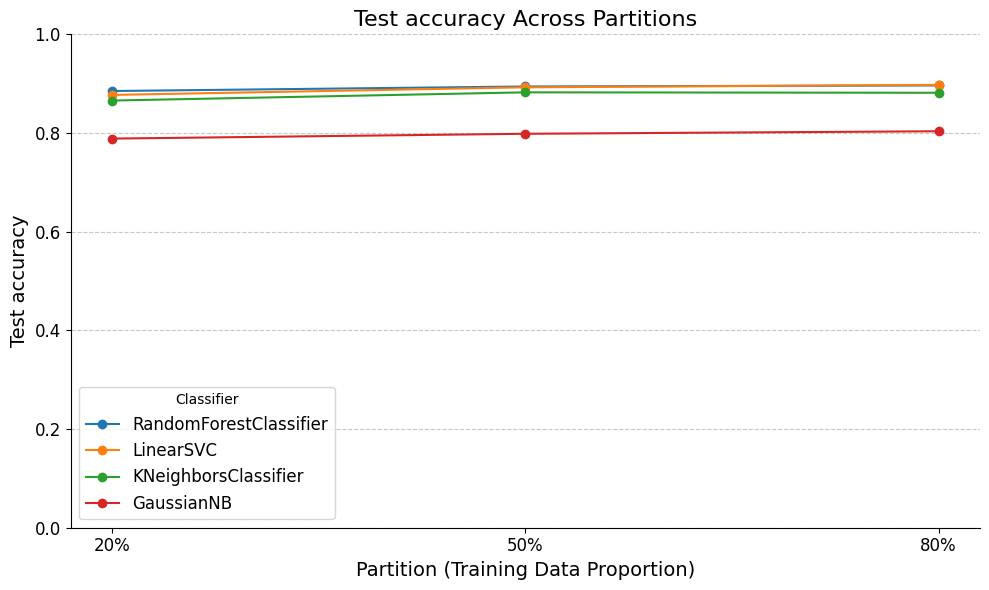

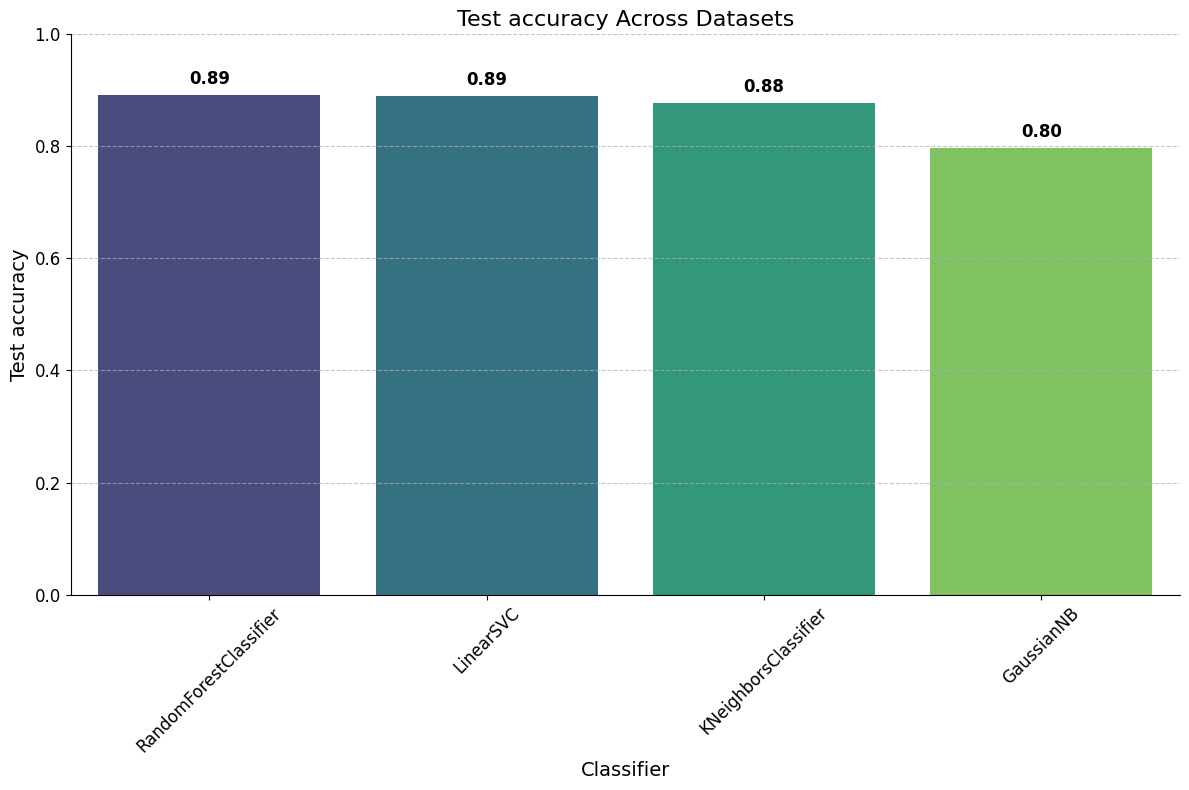

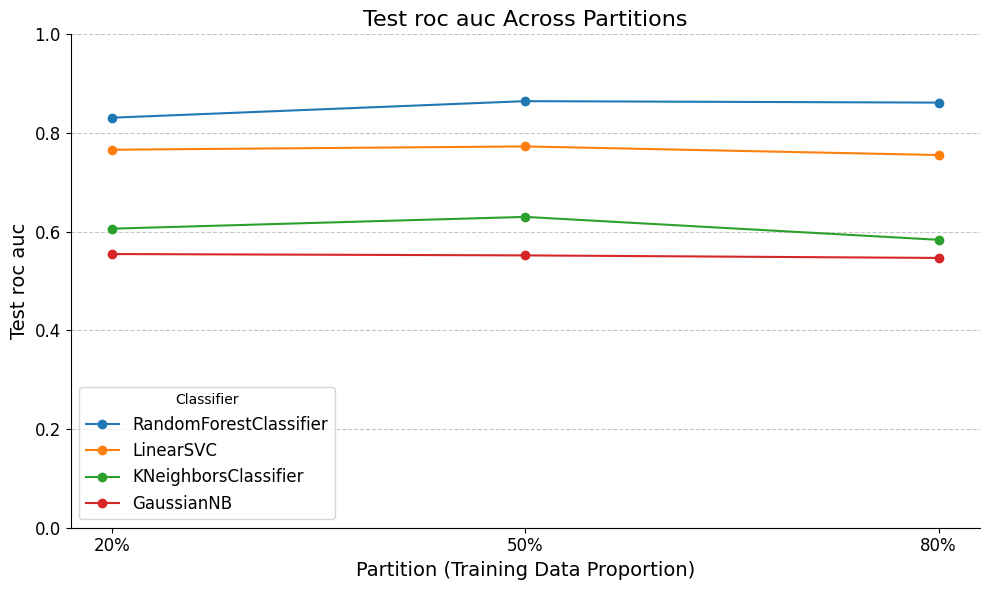

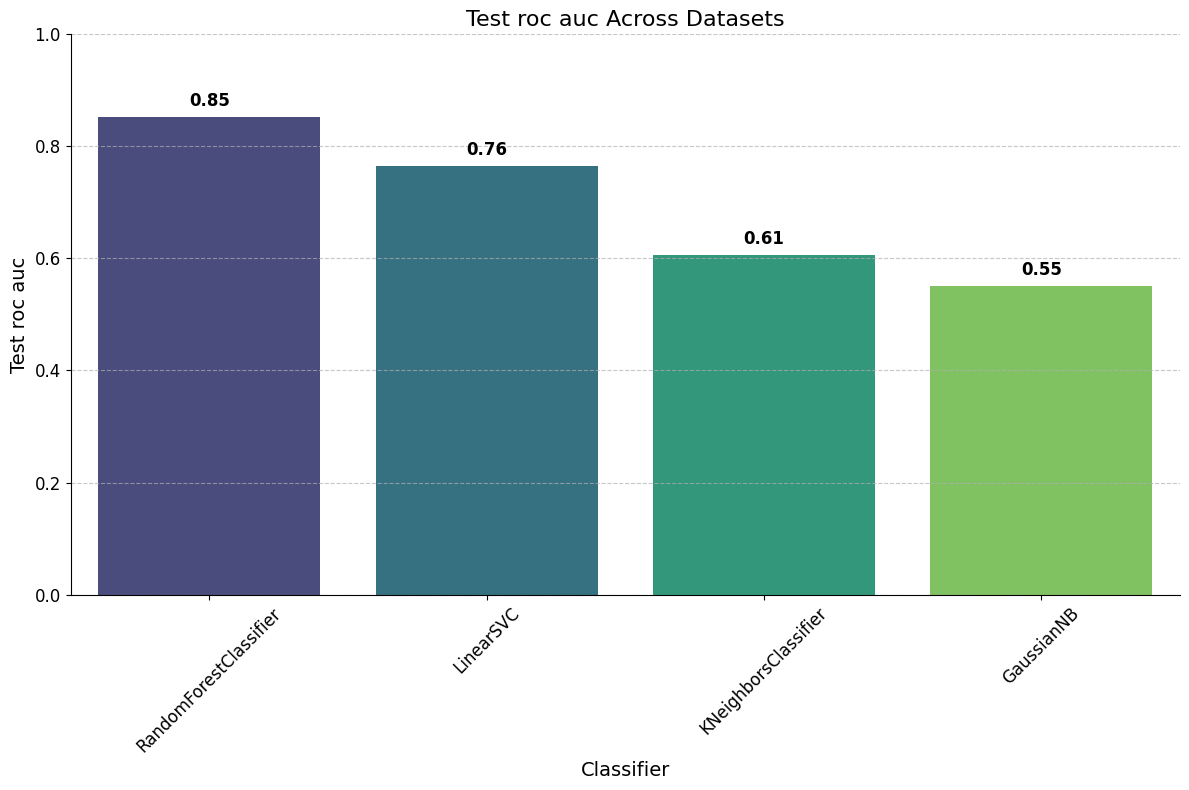

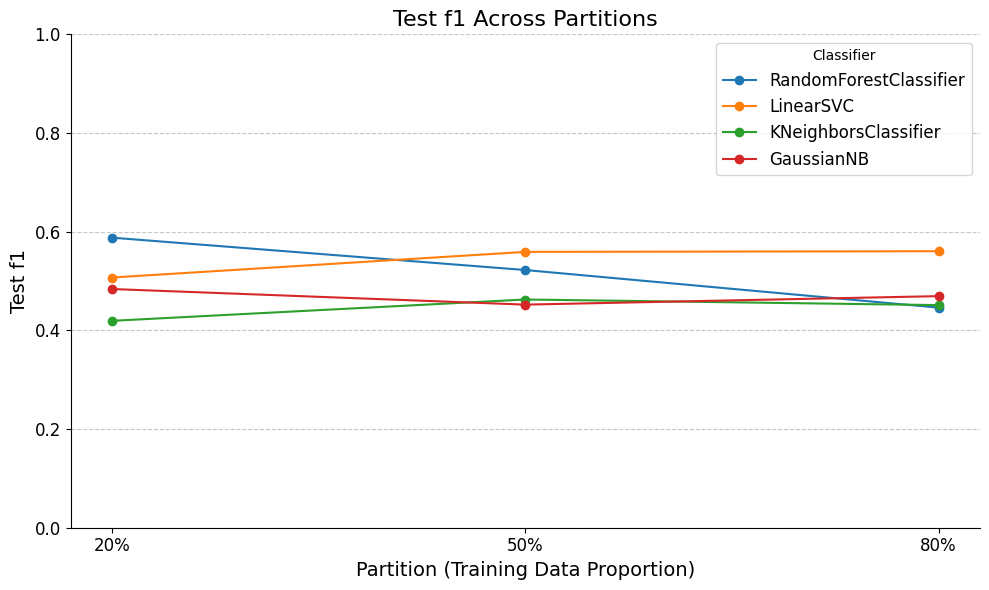

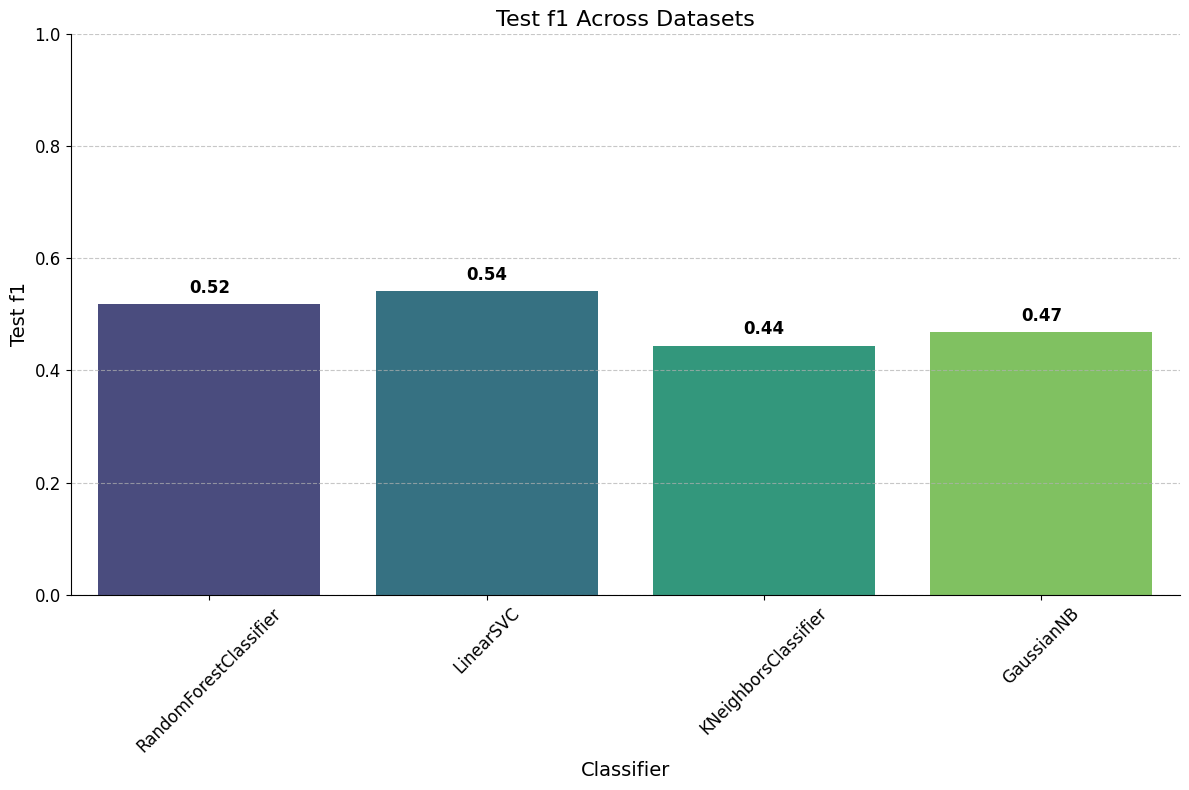

In [11]:
# direct comparison of models
# each instance gives 2 plots: the first one is the average metric across partitions (all models)
# the second one is the average metric across datasets (all models)
trainer.plot_comparison(metric='test_accuracy')
trainer.plot_comparison(metric='test_roc_auc')
trainer.plot_comparison(metric='test_f1')

In [12]:
results_table = build_results_table(trainer)
results_table

#results_table.to_csv("results_summary.csv", index=False)

,Dataset,Partition,Metric,Best Classifier,Best Score
0,breast_cancer,20% Training,test_accuracy,KNeighborsClassifier,0.948099
1,breast_cancer,20% Training,test_roc_auc,LinearSVC,0.960114
2,breast_cancer,20% Training,test_f1,RandomForestClassifier,0.539239
3,breast_cancer,50% Training,test_accuracy,LinearSVC,0.960234
4,breast_cancer,50% Training,test_roc_auc,LinearSVC,0.957347
5,breast_cancer,50% Training,test_f1,RandomForestClassifier,0.537069
6,breast_cancer,80% Training,test_accuracy,LinearSVC,0.973684
7,breast_cancer,80% Training,test_roc_auc,LinearSVC,0.955061
8,breast_cancer,80% Training,test_f1,RandomForestClassifier,0.562783
9,spambase,20% Training,test_accuracy,RandomForestClassifier,0.937608


In [33]:
# Apply normalization and aggregation
normalized_results = normalize_and_aggregate_results(trainer)
normalized_results.rename(columns={'Avg Score (Metrics)': 'Normalized Score'}, inplace=True)
normalized_results['Dataset'] = normalized_results['Dataset'].map(lambda x: x.replace('_', ' '))
normalized_results['Classifier'] = normalized_results['Classifier'].replace({'RandomForestClassifier': 'RF', 'LinearSVC': 'L-SVC', 'KNeighborsClassifier': 'KNN', 'GaussianNB': 'NB'})


normalized_results['Normalized Score'] = normalized_results['Normalized Score'].round(4)
normalized_results.to_csv("normalized_results.csv", index=False)
normalized_results

,Classifier,Dataset,Normalized Score
0,RF,breast cancer,0.8135
1,L-SVC,breast cancer,0.8210
2,KNN,breast cancer,0.6656
3,NB,breast cancer,0.6571
4,RF,spambase,0.7869
5,L-SVC,spambase,0.7831
6,KNN,spambase,0.7147
7,NB,spambase,0.7242
8,RF,heart disease,0.7584
9,L-SVC,heart disease,0.7176


In [37]:
# Generate and display the table
dataset_avg_table = average_across_datasets(trainer)
dataset_avg_table['test_accuracy'] = dataset_avg_table['test_accuracy'].round(4)
dataset_avg_table['test_roc_auc'] = dataset_avg_table['test_roc_auc'].round(4)
dataset_avg_table['test_f1'] = dataset_avg_table['test_f1'].round(4)
dataset_avg_table.rename(columns={'test_accuracy': 'Test accuracy', 'test_roc_auc': 'Tst ROC AUC', 'test_f1': 'Test F1 Score'}, inplace=True)
dataset_avg_table['Classifier']=dataset_avg_table['Classifier'].map({'RandomForestClassifier': 'RF', 'LinearSVC': 'L-SVC', 'KNeighborsClassifier': 'KNN', 'GaussianNB': 'NB'})
print("Results Averaged Across Datasets:")
print(dataset_avg_table)
dataset_avg_table.to_csv("dataset_avg_table.csv", index=False)

Results Averaged Across Datasets:
   Test accuracy  Tst ROC AUC  Test F1 Score Classifier
0         0.8919       0.8524         0.5188         RF
1         0.8891       0.7648         0.5422      L-SVC
2         0.8766       0.6065         0.4444        KNN
3         0.7969       0.5512         0.4685         NB


In [ ]:
# Generate and display the table
partition_comparison_all_table = summarize_partition_comparison_all_datasets(trainer, metric='test_accuracy')
print("Partition Comparison Across All Datasets:")
print(partition_comparison_all_table)
partition_comparison_all_table.to_csv("partition_comparison_all_table.csv", index=False)

Partition Comparison Across All Datasets:
                Classifier        Dataset  20% Train  50% Train  80% Train
0   RandomForestClassifier  breast_cancer   0.942251   0.939181   0.947368
1                LinearSVC  breast_cancer   0.943713   0.960234   0.973684
2     KNeighborsClassifier  breast_cancer   0.948099   0.947368   0.956140
3               GaussianNB  breast_cancer   0.917398   0.927485   0.929825
4   RandomForestClassifier       spambase   0.937608   0.947414   0.953312
5                LinearSVC       spambase   0.909445   0.916848   0.920738
6     KNeighborsClassifier       spambase   0.887893   0.913371   0.918929
7               GaussianNB       spambase   0.821244   0.819499   0.810713
8   RandomForestClassifier  heart_disease   0.808123   0.836689   0.827778
9                LinearSVC  heart_disease   0.806723   0.843400   0.844444
10    KNeighborsClassifier  heart_disease   0.799720   0.841163   0.822222
11              GaussianNB  heart_disease   0.820728   0.8

In [24]:
partition_comparison_roc_auc = summarize_partition_comparison_all_datasets(trainer, metric='test_roc_auc')
partition_comparison_roc_auc

,Classifier,Dataset,20% Train,50% Train,80% Train
0,RandomForestClassifier,breast_cancer,0.952782,0.948962,0.951929
1,LinearSVC,breast_cancer,0.960114,0.957347,0.955061
2,KNeighborsClassifier,breast_cancer,0.500000,0.500000,0.500000
3,GaussianNB,breast_cancer,0.500000,0.500000,0.500000
4,RandomForestClassifier,spambase,0.946110,0.953613,0.953350
5,LinearSVC,spambase,0.798053,0.805321,0.803720
6,KNeighborsClassifier,spambase,0.608114,0.734514,0.575660
7,GaussianNB,spambase,0.710230,0.680596,0.683524
8,RandomForestClassifier,heart_disease,0.778827,0.812055,0.827091
9,LinearSVC,heart_disease,0.730539,0.744948,0.684695


In [25]:
partition_comparison_f1 = summarize_partition_comparison_all_datasets(trainer, metric='test_f1')
partition_comparison_f1

,Classifier,Dataset,20% Train,50% Train,80% Train
0,RandomForestClassifier,breast_cancer,0.539239,0.537069,0.562783
1,LinearSVC,breast_cancer,0.539239,0.537069,0.562783
2,KNeighborsClassifier,breast_cancer,0.539239,0.537069,0.562783
3,GaussianNB,breast_cancer,0.539239,0.537069,0.562783
4,RandomForestClassifier,spambase,0.779536,0.454163,0.157442
5,LinearSVC,spambase,0.622043,0.638154,0.633936
6,KNeighborsClassifier,spambase,0.595416,0.601101,0.597201
7,GaussianNB,spambase,0.644037,0.674025,0.673732
8,RandomForestClassifier,heart_disease,0.634730,0.649224,0.651341
9,LinearSVC,heart_disease,0.477022,0.671289,0.655777


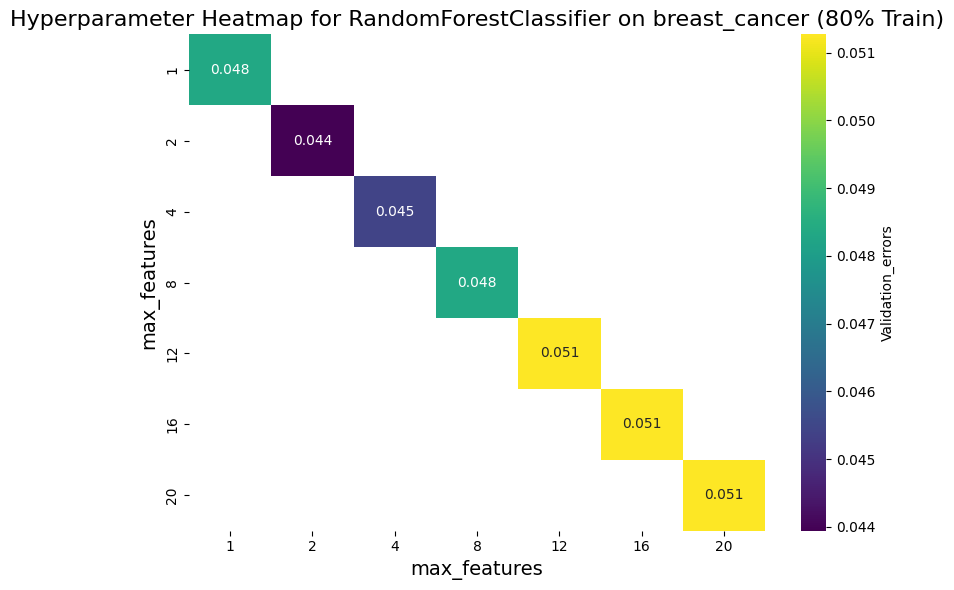

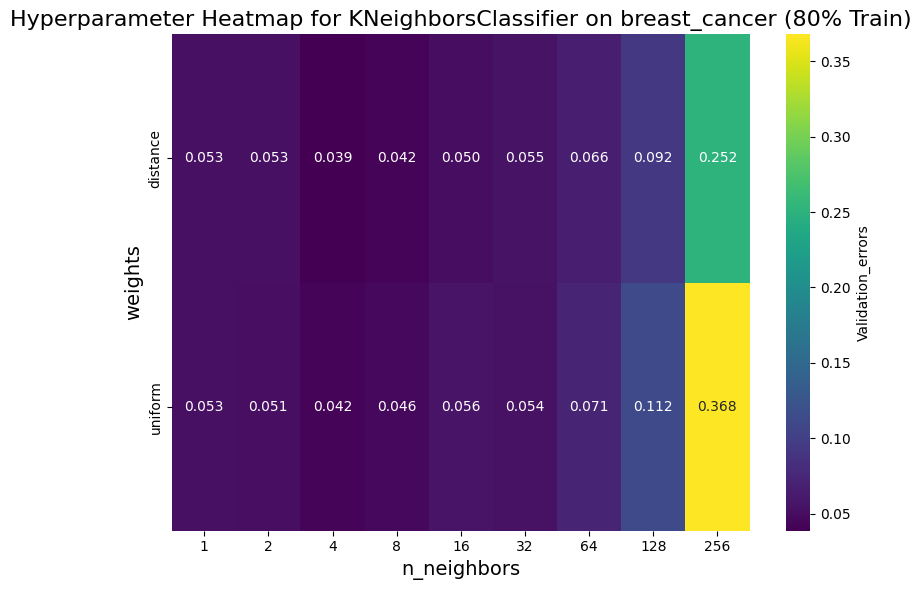

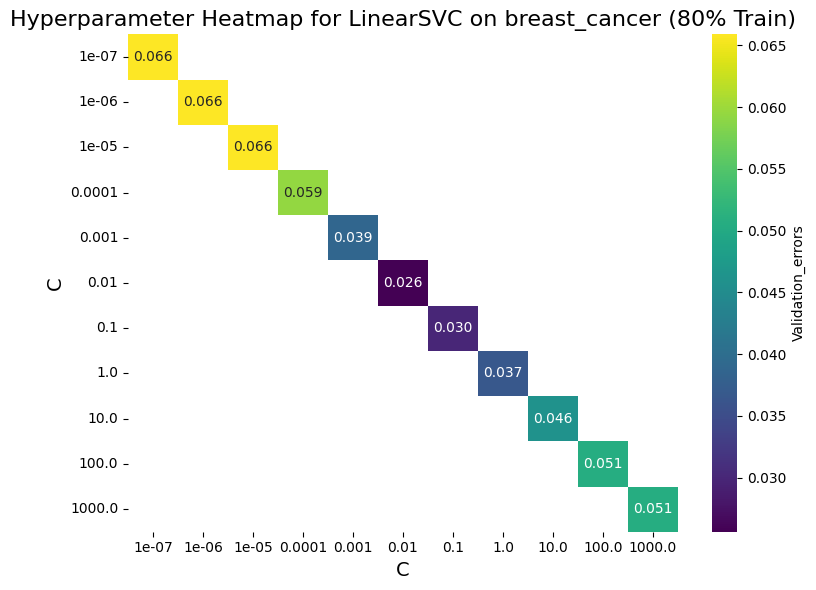

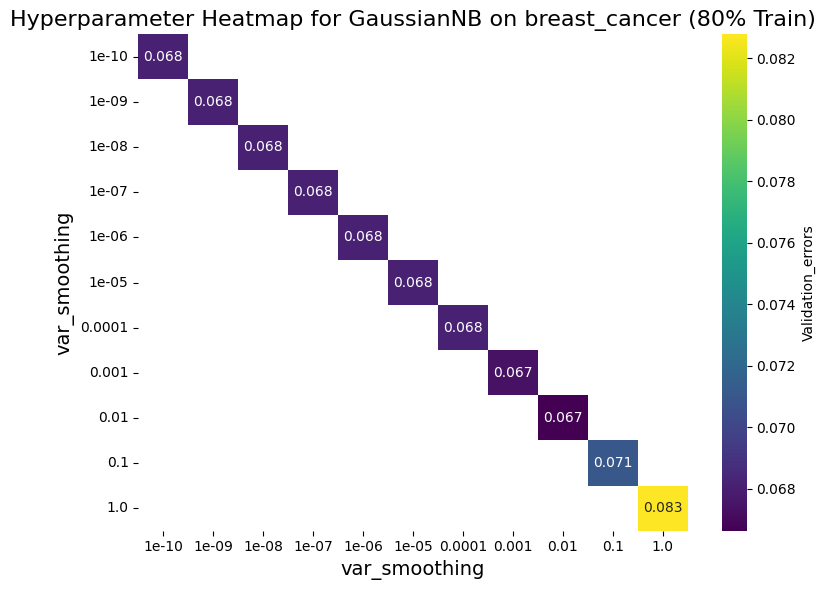

In [16]:
# inspect some hyperparameters heatmaps
plot_hyperparam_heatmap(
    trainer=trainer,
    dataset_name='breast_cancer',
    classifier_name='RandomForestClassifier',
    partition=0.8,
    param_x='max_features',
    param_y='max_features',
    metric='validation_errors'  
)

plot_hyperparam_heatmap(
    trainer=trainer,
    dataset_name='breast_cancer',
    classifier_name='KNeighborsClassifier',
    partition=0.8,
    param_x='n_neighbors',
    param_y='weights',
    metric='validation_errors'  
)

plot_hyperparam_heatmap(
    trainer=trainer,
    dataset_name='breast_cancer',
    classifier_name='LinearSVC',
    partition=0.8,
    param_x='C',
    param_y='C',
    metric='validation_errors'  
)

plot_hyperparam_heatmap(
    trainer=trainer,
    dataset_name='breast_cancer',
    classifier_name='GaussianNB',
    partition=0.8,
    param_x='var_smoothing',
    param_y='var_smoothing',
    metric='validation_errors'  
)